# Project Title: Car Price Prediction


## Outline 
- Creating a car-price prediction project with a linear regression model 
- Performing an initial exploratory data analysis with Jupyter notebook
- Setting up a validation framework
- Implementing the linear regression model and other regression model 
- Performing feature engineering for the model 
- Keeping the model under control with regularization 
- Using the model to predict car prices

## Project Description
The aim of this project is to develop a machine learning model that can accurately predict the price of a car based on various features such as make, model, mileage, year, and other relevant factors. The project will involve collecting a dataset of car listings with associated prices and features from online sources or existing databases. Data preprocessing steps will be implemented to clean and prepare the dataset for modeling, including handling missing values, encoding categorical variables, and scaling numerical features.

Next, various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting will be trained and evaluated using techniques like cross-validation and hyperparameter tuning to identify the best-performing model. Feature importance analysis will also be conducted to understand which features have the most significant impact on the predicted car prices.

The developed model will be deployed into a user-friendly interface, allowing users to input car features and obtain a predicted price estimate. Additionally, the project will include documentation detailing the steps involved in data collection, preprocessing, modeling, evaluation, and deployment, making it accessible for others to understand and replicate.

## Dataset Description 

### Dataset Url 
- https://www.kaggle.com/code/jshih7/car-price-prediction?select=data.csv


### Attributes

- make: make of a car (BMW, Toyota, and so on)
- model: model of a car
- year: year when the car was manufactured
- engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)
- engine_hp: horsepower of the engine
- engine_cylinders: number of cylinders in the engine
- transmission_type: type of transmission (automatic or manual)
- driven_wheels: front, rear, all
- number_of_doors: number of doors a car has
- market_category: luxury, crossover, and so on
- vehicle_size: compact, midsize, or large
- vehicle_style: sedan or convertible
- highway_mpg: miles per gallon (mpg) on the highway
- city_mpg: miles per gallon in the city
- popularity: number of times the car was mentioned in a Twitter stream
- msrp: manufacturer’s suggested retail price


## Importing Libraries


In [43]:
## loading and preprocessing data
import pandas as pd 
import numpy as np 

## visualization of data
import matplotlib.pyplot as plt 
import seaborn as sns 

## building validation framework 
from sklearn.model_selection import train_test_split 

## categorical encoding 
from sklearn.feature_extraction import DictVectorizer

## regression model 
from sklearn.linear_model import LinearRegression 

## metrics 
from sklearn.metrics import root_mean_squared_error

## Loading Data 

In [2]:
## loading dataset
data = pd.read_csv("Datasets/car_price_datatset.csv")

## create a copy 
df = data.copy()

## Data Preview And Understanding
- Loading the dataset

In [3]:
## view the first rows 
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
## view the last five rows 
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
## check the number of rows and columns 
print(f"{df.shape[0]}   {df.shape[1]}")

11914   16


In [6]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
## checking for missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
## checking for duplicated values 
df.duplicated().sum()

np.int64(715)

In [9]:
## checking type on columns
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
## lets return the total counts of unique values in each column 
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [11]:
for each_name in df.columns: 
    print(each_name)
    print(df[each_name].unique())

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '62

## Data preprocessing 
- normalize the columns 
- normalizing column types
    - year, numberofdoors, vhecial_size, v
- replacing unsual characters with NaN values
- Normalizing column names
- Filling of missing 

In [12]:
##change column names to lower case and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
df['year'] = df['year'].astype('category')
df['number_of_doors'] = df['number_of_doors'].astype('category')
df['vehicle_size'] = df['vehicle_size'].astype('category')
df['vehicle_style'] = df['vehicle_style'].astype('category')
df['make'] = df['make'].astype('category')
df['transmission_type'] = df['transmission_type'].astype('category')
df['market_category'] = df['market_category'].astype('category')
df['engine_cylinders'] = df['engine_cylinders'].astype('category')
df['engine_fuel_type'] = df['engine_fuel_type'].astype('category')
df['model'] = df['model'].astype('category')

In [ ]:
## lets fill in col for engine_cylinders 
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].value_counts().index[0])
## 
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].value_counts().index[0])
#
df['market_category'] = df['market_category'].fillna(df['market_category'].value_counts().index[0])
#
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(df['engine_fuel_type'].value_counts().index[0])

In [14]:
df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].mean())

## Descriptive Analysis
- statistical summary

In [15]:
df.describe().round()

,engine_hp,highway_mpg,city_mpg,popularity,msrp
count,11914.0,11914.0,11914.0,11914.0,11914.0
mean,249.0,27.0,20.0,1555.0,40595.0
std,109.0,9.0,9.0,1442.0,60109.0
min,55.0,12.0,7.0,2.0,2000.0
25%,170.0,22.0,16.0,549.0,21000.0
50%,227.0,26.0,18.0,1385.0,29995.0
75%,300.0,30.0,22.0,2009.0,42231.0
max,1001.0,354.0,137.0,5657.0,2065902.0


In [16]:
numerical_cols = df.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

corr_matrix['msrp']

engine_hp      0.661644
highway_mpg   -0.160043
city_mpg      -0.157676
popularity    -0.048476
msrp           1.000000
Name: msrp, dtype: float64

## Exploratory Data Analysis
- Target variable analysis
- Plot a coorelation againts the target variable
- Outlier analysis

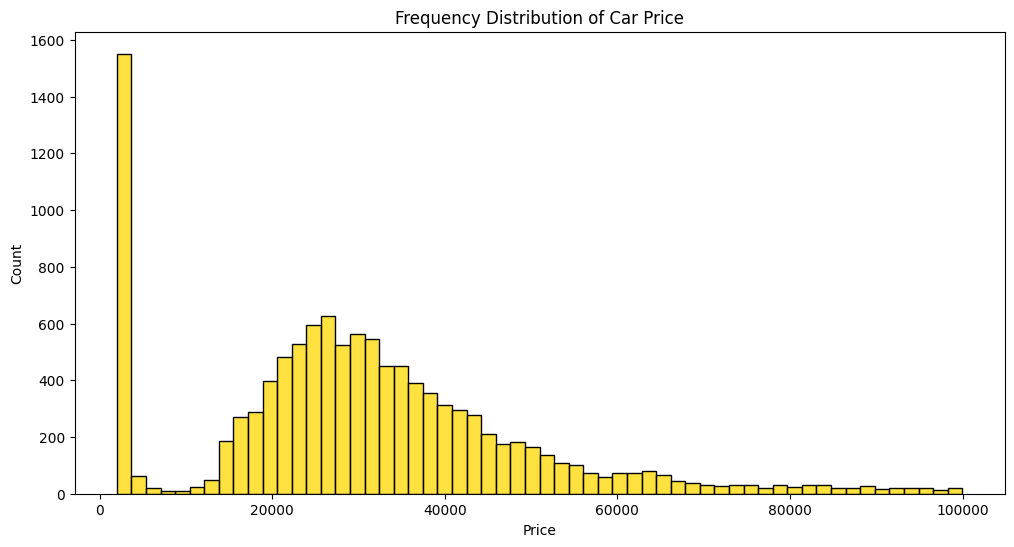

In [17]:
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Count') 

sns.histplot(df['msrp'][df['msrp'] < 100000], color='gold') 

plt.show()


In [18]:
## log transformation 
log_price = np.log1p(df['msrp'])

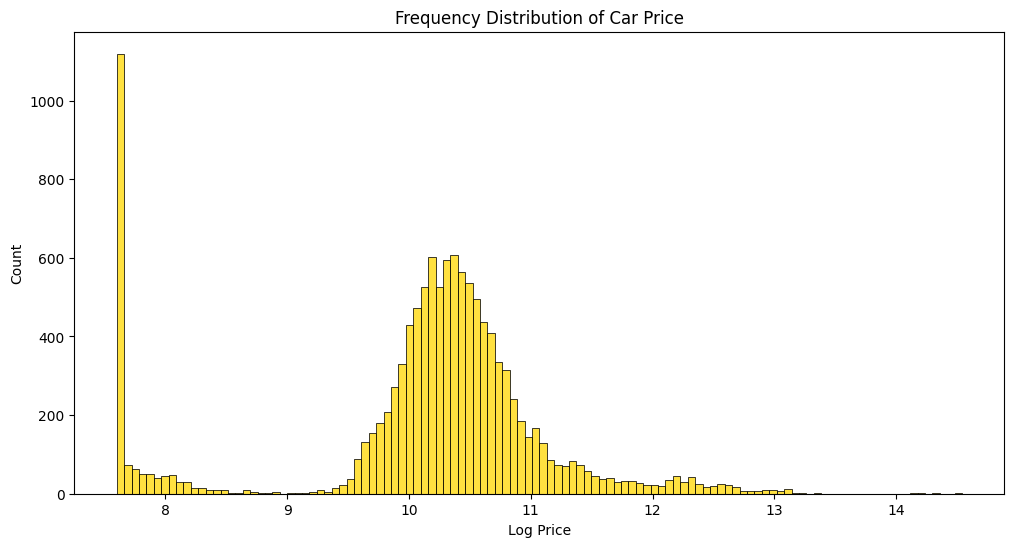

In [19]:

plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Car Price')
plt.xlabel('Log Price')
plt.ylabel('Count') 

sns.histplot(log_price, color='gold') 

plt.show()

In [ ]:
## performing a coorelation on numerical column
## select numerical ..


## Building a validation framework 
- Training dataset 60%
- Validation dataset 20%
- Testing dataset 20%

In [21]:
df_train_full, df_test = train_test_split(df, test_size=0.2 , random_state=10)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=10) 

print(f'Size of Training Dataset {len(df_train)}')
print(f'Size of Validation Dataset {len(df_valid)}')
print(f'Size of Testing Dataset {len(df_test)}')

Size of Training Dataset 7148
Size of Validation Dataset 2383
Size of Testing Dataset 2383


In [22]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11118,Volvo,V60 Cross Country,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,28,20,870,44850
8136,Dodge,Ram Cargo,2003,regular unleaded,175.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Van,15,13,1851,22190
3064,Honda,CR-V,2016,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,33,26,2202,24545
3476,Dodge,Dakota,2010,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Compact,Crew Cab Pickup,18,14,1851,29275
271,Nissan,350Z,2007,regular unleaded,306.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,25,18,2009,29600


## Data Preprocessing 2 

In [25]:
## 
y_train = np.log1p(df_train['msrp']).values
y_valid = np.log1p(df_valid['msrp']).values
y_test = np.log1p(df_test['msrp']).values 

In [35]:
y_valid

array([11.03812636, 11.87340018, 10.42794977, ..., 11.70808921,
        9.88129307, 10.06458547])

In [26]:
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp'] 

In [31]:
## select the cols with int and float 
df_train_bl = df_train.select_dtypes(include=['int', 'float'])
df_valid_bl = df_valid.select_dtypes(include=['int', 'float']) 

## 
X_train_bl = df_train_bl.values 
X_valid_bl = df_valid_bl.values 

## Training a Baseline Linear Regression 

In [32]:
## instance of the model 
lr_bl_model = LinearRegression() 

## traing the model 
lr_bl_model.fit(X_train_bl, y_train) 

LinearRegression()

## Model Evaluation 

In [33]:
## generate validation predictions 
y_valid_pred = lr_bl_model.predict(X_valid_bl) 

In [37]:
## 
rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Baseline Validation Metic {round(rmse_bl, 2) * 100} %')

Baseline Validation Metic 86.0 %


In [41]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

## Feature Engineering 
- select two categorical cols: year, transmission_type 

In [49]:
## create a newlist of the col names 
cat_fe_1 = ['year', 'transmission_type']

numerical_cols = ['engine_hp', 'city_mpg', 'popularity', 'highway_mpg']


df_train_fe_1 = df_train[numerical_cols + cat_fe_1]

df_valid_fe_1 = df_valid[numerical_cols + cat_fe_1]


In [50]:
## convert our dataframe to a dictionary 
dict_train_fe_1 = df_train_fe_1.to_dict(orient='records')
dict_valid_fe_1 = df_valid_fe_1.to_dict(orient='records')

In [46]:
## create an instance 
dv = DictVectorizer(sparse=False)

dv.fit(dict_train_fe_1)

DictVectorizer(sparse=False)

In [51]:
X_train_fe_1 = dv.transform(dict_train_fe_1)
X_valid_fe_1 = dv.transform(dict_valid_fe_1)

## Train Fe_1 Model 

In [52]:
lr_fe_1_model = LinearRegression() 

lr_fe_1_model.fit(X_train_fe_1, y_train)

LinearRegression()

In [53]:
y_valid_pred_fe_1 = lr_fe_1_model.predict(X_valid_fe_1)

In [55]:
rmse_fe_1 = root_mean_squared_error(y_valid, y_valid_pred_fe_1)

print(f'Log Reg Validation Metric for Fe_1:  : {round(rmse_fe_1, 2) * 100} %')

Log Reg Validation Metric for Fe_1:  : 51.0 %


## Save The Model 

## Load The Model 

## Make Predictions 